# Statistics for relations

In [ ]:
import statistics as stats
stats.covariance() # Sample covariance for two variables.
stats.correlation()  # Pearson’s correlation coefficient for two variables.
stats.linear_regression()  # Slope and intercept for simple linear regression.

## Lorenz curve (LC)

- A LC is a graphical representation of the distribution of income or wealth within a population.
- It graphs the percentiles of the population against cumulative income or wealth of people at or below that percentile. 
- It is often accompanied by a straight diagonal line with a slope of 1, which represents perfect equality in income or wealth distribution; the LC lies beneath it, showing the observed or estimated distribution. 
- The area between the straight line and the curved line, expressed as a ratio of the area under the straight line, is the **Gini coefficient**, a scalar measurement of inequality.

 The graph plots percentiles of the population on the horizontal axis according to income or wealth and plots cumulative income or wealth on the vertical axis, so that an x-value of 45 and a y-value of 14.2 would mean that the bottom 45% of the population controls 14.2% of the total income or wealth.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# To make a skewed dataset, I append two Poisson random samples together.
X = np.append(np.random.poisson(lam=10, size=40), np.random.poisson(lam=100, size=10))
X

array([ 15,  15,   9,  17,  10,  11,  16,  12,  13,   6,   9,  15,  13,
         7,  11,  14,  13,   7,   8,  11,  11,   7,  10,   9,  10,   9,
        12,  12,   5,   6,   5,  10,   6,  10,   7,  11,   6,  10,  10,
        12, 106,  95, 110, 107, 106, 104, 107,  93,  97,  98])

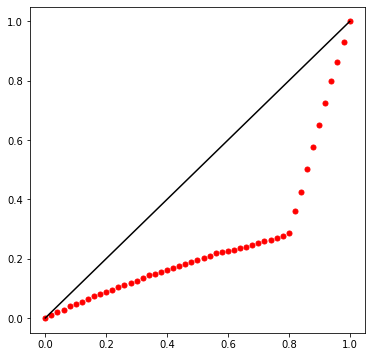

In [3]:
def lorenz_curve(X):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='.', color='r', s=100);
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')

lorenz_curve(X)

## Gini-Coefficient

${\displaystyle G={\frac {2\sum _{i=1}^{n}iy_{i}}{n\sum _{i=1}^{n}y_{i}}}-{\frac {n+1}{n}}}$

- The Gini coefficient measures the inequality among values of a frequency distribution, like the levels of income. 
- G = 0 $\rightarrow$ perfect equality
- G = 1  $\rightarrow$ maximal inequality 

In [4]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

gini(X)

0.5572505233775298

## Contingency table / Cross tabulations
- describes the relationships between two or more categorical variables
- provides a basic picture of the interrelation between two variables and can help find interactions between them
- A crucial problem of multivariate statistics is finding the (direct-)dependencies underlying the variables 
- Contingency tables can help reveal conditional independencies wich is the foundation of many statistical models
<br>

### Conditionl Independence<br>
Knowing C makes A and B independent.

If $A$ and $B$ are independent than:
$P(A ∩ B) = P(A)  P(B)$

Let $A, B$, and $C$ be events. <br> 
Let's say $A$ is the heigth of a child and $B$ is its vocabulary, <br>
we'd assume $A$ and $B$ are **dependent** but knowing their age $C$ makes the  knowledge of height irrelevant<br> 
$A$ and $B$ thus become conditionally **independent**<br><br>
$A$ and $B$ are said to be *conditionally independent* given $C$ if and only if $P ( C ) > 0$ and:<br>
$P(A,B|C) = P(A|C) * P(B|C)$ <br>

This property is often written: ${\displaystyle (A\perp \!\!\!\perp B\mid C)} $

### using crosstab</br>
pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False)

In [10]:
import pandas as pd

In [11]:
dd = pd.DataFrame([["no", "short", 86], ["no", "middel", 19], ["no", "long", 18],
                                 ["apprentice", "short", 170], ["apprentice", "middel", 43], ["apprentice", "long", 20],
                                 ["specialized", "short", 40], ["specialized", "middel", 11], ["specialized", "long",5], 
                                 ["academia", "short", 28], ["academia", "middel", 4], ["academia", "long", 3]],            
                 columns=["trained", "jobless", "number"])
dd

,trained,jobless,number
0,no,short,86
1,no,middel,19
2,no,long,18
3,apprentice,short,170
4,apprentice,middel,43
5,apprentice,long,20
6,specialized,short,40
7,specialized,middel,11
8,specialized,long,5
9,academia,short,28


In [12]:
# unfourtunately pd.crosstab crosstab by default arrange the index and 
# columns in an ascending order & this order can’t be changed.
ct = pd.crosstab(index=dd.trained, columns=dd.jobless, values=dd.number, 
                           aggfunc="sum", margins=True, normalize="columns")         #   ‘columns’ -> sum by level of training
ct  

jobless,long,middel,short,All
trained,,,,
academia,0.065217,0.051948,0.086420,0.078300
apprentice,0.434783,0.558442,0.524691,0.521253
no,0.391304,0.246753,0.265432,0.275168
specialized,0.108696,0.142857,0.123457,0.125280


### heatmap

<Figure size 432x288 with 0 Axes>

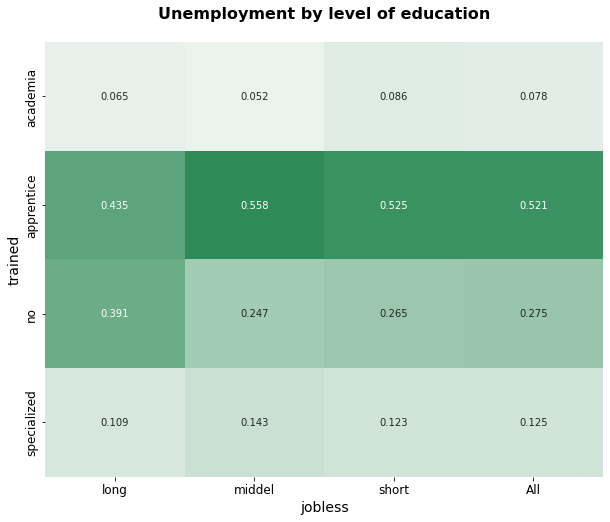

In [13]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.clf();                                     # Clear the current figure.

fig, ax = plt.subplots(figsize=(10, 8), facecolor="#FFFFFF"); # figure color
ax.set_aspect("auto");     # "equal", or float representing aspect ratio of y to x
plt.title("Unemployment by level of education", fontsize=16, y=1.04,  fontweight="bold")
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cmap = sn.light_palette("seagreen", as_cmap=True);
res = sn.heatmap(ct, annot=True, fmt='.3f', cmap=cmap, cbar=False);

plt.savefig("crosstab.png", bbox_inches='tight', dpi=200);        # saves the graph
plt.show()

### selfmade crosstab
to impose the preferred order of row & columns one can create a selfmade crosstab

In [14]:
df = pd.DataFrame(
{"short":[86, 170, 40, 28],
 "middel":[19, 43, 11, 4],
 "long":[18,20,5,3] },
index = ["no" ,"apprentice", "specialized", "academia"])
df

,short,middel,long
no,86,19,18
apprentice,170,43,20
specialized,40,11,5
academia,28,4,3


add margin of rows and columns

In [15]:
#Total sum per row: 
df.loc[:, "sum"] = df.sum(axis=1)
#Total sum per column: 
df.loc['sum',:]= df.sum(axis=0)
df

,short,middel,long,sum
no,86.0,19.0,18.0,123.0
apprentice,170.0,43.0,20.0,233.0
specialized,40.0,11.0,5.0,56.0
academia,28.0,4.0,3.0,35.0
sum,324.0,77.0,46.0,447.0


### relative frequency

In [16]:
rel = round(df/447, 4)  # divided by total, round to 4 figures

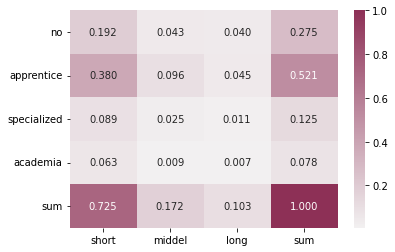

In [17]:
# c = sn.light_palette((248,43,71), input="husl", as_cmap=True);
c = sn.light_palette("#8D3056", as_cmap=True)
res = sn.heatmap(rel, annot=True, fmt='.3f', cmap=c, cbar=True);